In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
%run src/bycv_model.py

In [3]:
by = BYCV()

In [4]:
a = stability_exp_analytic(by)

In [15]:
a

-0.003154479711489406

A figure showing approximation of stability exponent at different levels of discretization.

In [16]:
D_vals = np.arange(5, 250, step=5)
discrete_exponent_vals = np.empty_like(D_vals, dtype=np.float64)

In [17]:
for d, D in enumerate(D_vals):
    discrete_exponent_vals[d] = stability_exp_discretized(by, D=D)

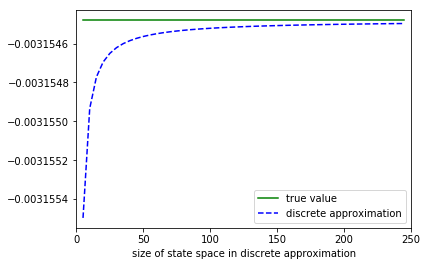

In [20]:
fig, ax = plt.subplots()
ax.ticklabel_format(useOffset=False) 
#ax.set_ylim((a - 1.5 * 1e-8, a + 2 * 1e-9))
ax.plot(D_vals, np.ones_like(D_vals) * a, 'g-', label="true value")
ax.plot(D_vals, discrete_exponent_vals, 'b--', label="discrete approximation")
#ax.set_ylim((-0.0032, 0.0))
ax.set_xlim((0, 250))
ax.set_xlabel("size of state space in discrete approximation")
ax.legend()
plt.savefig("discretization_vs_true_fig.pdf")

In [19]:
discrete_exponent_vals

array([-0.0031555 , -0.00315493, -0.00315477, -0.0031547 , -0.00315465,
       -0.00315462, -0.0031546 , -0.00315458, -0.00315457, -0.00315456,
       -0.00315456, -0.00315455, -0.00315454, -0.00315454, -0.00315454,
       -0.00315453, -0.00315453, -0.00315453, -0.00315452, -0.00315452,
       -0.00315452, -0.00315452, -0.00315452, -0.00315451, -0.00315451,
       -0.00315451, -0.00315451, -0.00315451, -0.00315451, -0.00315451,
       -0.00315451, -0.00315451, -0.0031545 , -0.0031545 , -0.0031545 ,
       -0.0031545 , -0.0031545 , -0.0031545 , -0.0031545 , -0.0031545 ,
       -0.0031545 , -0.0031545 , -0.0031545 , -0.0031545 , -0.0031545 ,
       -0.0031545 , -0.0031545 , -0.0031545 , -0.0031545 ])

A table that compares discretized val vs actual value for different values of the parameters

In [32]:
by.γ

2.5

In [56]:
D_vals = [5, 50, 100, 500]
gamma_vals = [7.5, 10, 12.5]

se_table = np.empty((len(gamma_vals), len(D_vals) + 1))

In [57]:
for i, γ in enumerate(gamma_vals):
    by = BYCV(γ=γ)
    se_table[i, 0] = stability_exp_analytic(by)
    for j, d in enumerate(D_vals):
        se_table[i, j+1] = round(stability_exp_discretized(by, D=d), 7)

In [58]:
se_table

array([[-0.00389085, -0.0042114 , -0.00392   , -0.0039054 , -0.0038937 ],
       [-0.00123118, -0.002304  , -0.0013374 , -0.0012843 , -0.0012418 ],
       [ 0.00344707,  0.000879  ,  0.0031674 ,  0.0033064 ,  0.0034188 ]])

In [59]:
def make_table(table):
    pd_table = pd.DataFrame(table)
    print(pd_table.to_latex(float_format=lambda x: '%1.7f' % x))

In [60]:
make_table(se_table)

\begin{tabular}{lrrrrr}
\toprule
{} &          0 &          1 &          2 &          3 &          4 \\
\midrule
0 & -0.0038908 & -0.0042114 & -0.0039200 & -0.0039054 & -0.0038937 \\
1 & -0.0012312 & -0.0023040 & -0.0013374 & -0.0012843 & -0.0012418 \\
2 &  0.0034471 &  0.0008790 &  0.0031674 &  0.0033064 &  0.0034188 \\
\bottomrule
\end{tabular}

